In [1]:
import cPickle as pickle
import scipy.interpolate as interp
sys.path.append('../src')
import Analyzer
import Grapher
import Munger
import PAD
import Plasma_Plotter
import Scraper

In [6]:
def calc_mec_to_tknot(tknot,mec_munge,frame):
    if frame == 'gse':
        mec_interp_x = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,0])
        mec_interp_y = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,1])
        mec_interp_z = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gse_pos'][:,2])
    if frame == 'gsm':
        mec_interp_x = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,0])
        mec_interp_y = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,1])
        mec_interp_z = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['gsm_pos'][:,2])
    mec_interp_mlt = interp.interp1d(mdates.date2num(mec_munge[0]['epochs']),mec_munge[0]['mlt'][:])
        
    Re = 6378.14
    
    xknot   = mec_interp_x(tknot)/Re
    yknot   = mec_interp_y(tknot)/Re
    zknot   = mec_interp_z(tknot)/Re
    mltknot = mec_interp_mlt(tknot)
    
    return [xknot,yknot,zknot,mltknot]

In [116]:
def calculate_scalar_pressure(smoms_munge):
    #determine the number of strides
    num_strides = len(smoms_munge)
    
    for N in range(num_strides):
        scalar_p    = np.zeros(len(smoms_munge[N]['epochs']))
        scalar_p[:] = (smoms_munge[N]['pres_s'][:,0,0]+smoms_munge[N]['pres_s'][:,1,1]+smoms_munge[N]['pres_s'][:,2,2])/3.0
        
        smoms_munge[N]['scalar_p'] = scalar_p

In [115]:
def calculate_plasma_beta(fgm_munge,smoms_munge):
    #determine the number of strides
    num_strides = len(smoms_munge)
    
    #make a compatible fgm_munge
    sfgm_munge = Munger.adapt_munge_to_munge(fgm_munge,smoms_munge)
    
    #enter some physical constants
    mu_0 = 4*np.pi*1.0e-7
    
    #calculate plasma beta
    for N in range(num_strides):
        p_mag = (sfgm_munge[N]['Bbcs'][:,3]*1.0e-9)**2/(2*mu_0)
        beta  = smoms_munge[N]['scalar_p']*1.0e-9/p_mag
        
        smoms_munge[N]['beta'] = beta

# Import the project-specific files

In [7]:
obs = 'mms1'
obs_files = pickle.load(open('c:/Users/cschiff/Documents/github/Ion_Flow_Analysis_06_08_2017.data_local','r')) 
m1f = obs_files[obs]

# Create the munges

## Magnetic Field Munges

In [10]:
fgm_munge     = Munger.make_munge_via_translation(obs,'fgm',Munger.fgm_delta,m1f['fgm_b'],Munger.fgm_translation) 
print 
fgm_s_munge   = Munger.make_munge_via_translation(obs,'fgm',Munger.fgm_delta_srvy,m1f['fgm_s'],Munger.fgm_translation_srvy) 

segment 1 - start: 2017-06-08 13:39:33.513035 stop 2017-06-08 13:41:33.506572
fresh segment - first stride
segment 2 - start: 2017-06-08 13:41:33.514385 stop 2017-06-08 13:44:03.508260
adjacency underway
segment 3 - start: 2017-06-08 13:44:03.516073 stop 2017-06-08 13:46:23.509836
adjacency underway
segment 4 - start: 2017-06-08 13:46:23.517649 stop 2017-06-08 13:48:53.511525
adjacency underway
segment 5 - start: 2017-06-08 13:48:53.519338 stop 2017-06-08 13:50:03.512313
adjacency underway
segment 6 - start: 2017-06-08 13:50:03.520127 stop 2017-06-08 13:51:32.513316
adjacency underway
segment 7 - start: 2017-06-08 13:51:33.521140 stop 2017-06-08 13:53:53.514903
break in adjacency - new stride
segment 8 - start: 2017-06-08 13:53:53.522717 stop 2017-06-08 13:56:23.516595
adjacency underway
segment 9 - start: 2017-06-08 13:56:23.524407 stop 2017-06-08 13:58:03.517722
adjacency underway
segment 10 - start: 2017-06-08 13:58:03.525534 stop 2017-06-08 13:59:43.518849
adjacency underway
segmen

## FPI Munges

In [11]:
emoms_munge   = Munger.make_munge_via_translation(obs,'emoms',Munger.des_delta,m1f['emoms_b'],Munger.emoms_translation)
print
emoms_f_munge = Munger.make_munge_via_translation(obs,'emoms',Munger.des_delta_fast,m1f['emoms_f'],Munger.emoms_translation_fast)
print
imoms_munge   = Munger.make_munge_via_translation(obs,'imoms',Munger.dis_delta,m1f['imoms_b'],Munger.imoms_translation)
print
imoms_f_munge = Munger.make_munge_via_translation(obs,'imoms',Munger.dis_delta_fast,m1f['imoms_f'],Munger.imoms_translation_fast)
#edist_munge = Munger.make_munge_via_translation(obs,'edist',Munger.des_delta,m1f['edist_b'],Munger.edist_translation)
#idist_munge = Munger.make_munge_via_translation(obs,'idist',Munger.dis_delta,m1f['idist_b'],Munger.idist_translation)

segment 1 - start: 2017-06-08 13:39:33.001312 stop 2017-06-08 13:41:32.971938
fresh segment - first stride
segment 2 - start: 2017-06-08 13:41:33.001944 stop 2017-06-08 13:44:02.972727
adjacency underway
segment 3 - start: 2017-06-08 13:44:03.002733 stop 2017-06-08 13:46:22.983465
adjacency underway
segment 4 - start: 2017-06-08 13:46:23.013470 stop 2017-06-08 13:48:52.984254
adjacency underway
segment 5 - start: 2017-06-08 13:48:53.014260 stop 2017-06-08 13:50:02.974623
adjacency underway
segment 6 - start: 2017-06-08 13:50:03.004629 stop 2017-06-08 13:51:32.945097
adjacency underway
segment 7 - start: 2017-06-08 13:51:33.005103 stop 2017-06-08 13:53:52.985835
break in adjacency - new stride
segment 8 - start: 2017-06-08 13:53:53.015840 stop 2017-06-08 13:56:22.986627
adjacency underway
segment 9 - start: 2017-06-08 13:56:23.016632 stop 2017-06-08 13:58:02.977154
adjacency underway
segment 10 - start: 2017-06-08 13:58:03.007159 stop 2017-06-08 13:59:42.997682
adjacency underway
segmen

## Waves Munges

In [12]:
bpsd_munge  = Munger.make_munge_via_translation(obs,'bpsd',Munger.bpsd_delta,m1f['bpsd_f'],Munger.bpsd_translation)
epsd_munge  = Munger.make_munge_via_translation(obs,'epsd',Munger.epsd_delta,m1f['epsd_f'],Munger.epsd_translation)

segment 1 - start: 2017-06-08 01:29:09.571625 stop 2017-06-08 23:59:58.460635
fresh segment - first stride
Munged 1 series for bpsd on mms1!
segment 1 - start: 2017-06-08 01:29:09.570846 stop 2017-06-08 23:59:58.459856
fresh segment - first stride
Munged 1 series for epsd on mms1!


## MEC Munge

In [13]:
mec_munge   = Munger.make_munge_via_translation(obs,'mec',Munger.mec_delta,m1f['mec_s'],Munger.mec_translation)
#scpot_munge = Munger.make_munge_via_translation(obs,'scpot',0,m1f['scpot_f'],Munger.scpot_translation)

segment 1 - start: 2017-06-08 00:00:00 stop 2017-06-08 23:59:30
fresh segment - first stride
Munged 1 series for mec on mms1!


# Adapt Select Munges and check interpolation

## Adapt fgm to the electron munges (brst & fast)

In [14]:
efgm_munge   = Munger.adapt_munge_to_munge(fgm_munge,emoms_munge)
print
efgm_f_munge = Munger.adapt_munge_to_munge(fgm_s_munge,emoms_f_munge)

fgm flavored
fgm flavored
fgm flavored

Direct adaptation of source_munge to target_munge not possible.
Terminating with extreme prejudice!!!


## Adapt fgm to the ion munges (brst & fast)

In [17]:
ifgm_munge   = Munger.adapt_munge_to_munge(fgm_munge,imoms_munge)
print
ifgm_f_munge = Munger.adapt_munge_to_munge(fgm_s_munge,imoms_f_munge)

fgm flavored
fgm flavored
fgm flavored

Direct adaptation of source_munge to target_munge not possible.
Terminating with extreme prejudice!!!


(736488.5741031602, 736488.5741043176)

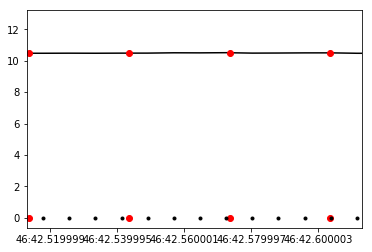

In [98]:
comp = 3
eQ = np.zeros(emoms_munge[0]['epochs'].shape)
fQ = np.zeros(fgm_munge[0]['epochs'].shape)
plt.plot(emoms_munge[0]['epochs'],eQ,'ro')
plt.plot(fgm_munge[0]['epochs'],fQ,'k.')
plt.plot(fgm_munge[0]['epochs'],fgm_munge[0]['Bbcs'][:,comp],'k-')
plt.plot(efgm_munge[0]['epochs'],efgm_munge[0]['Bbcs'][:,comp],'ro')
time_step = dt.timedelta(microseconds=200000)
#n = 645  #random (maybe) point in the middle
#n = 0     #start of the series
n = 2145  #end of the series
plt.xlim([dt.datetime(2017,6,8,13,39,33,513035)+n*time_step,dt.datetime(2017,6,8,13,39,33,613035)+n*time_step])

In [19]:
iemoms_munge = Munger.adapt_munge_to_munge(emoms_munge,imoms_munge)

moms flavored
moms flavored
moms flavored


(736488.5741031602, 736488.5741066324)

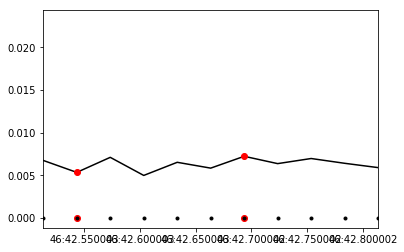

In [20]:
comp0 = 0
comp1 = 0
eQ = np.zeros(emoms_munge[0]['epochs'].shape)
iQ = np.zeros(imoms_munge[0]['epochs'].shape)
plt.plot(imoms_munge[0]['epochs'],iQ,'ro')
plt.plot(emoms_munge[0]['epochs'],eQ,'k.')
plt.plot(emoms_munge[0]['epochs'],emoms_munge[0]['pres_s'][:,comp0,comp1],'k-')
plt.plot(iemoms_munge[0]['epochs'],iemoms_munge[0]['pres_s'][:,comp0,comp1],'ro')
time_step = dt.timedelta(microseconds=200000)
#n = 645  #random (maybe) point in the middle
#n = 0     #start of the series
n = 2145  #end of the series
plt.xlim([dt.datetime(2017,6,8,13,39,33,513035)+n*time_step,dt.datetime(2017,6,8,13,39,33,813035)+n*time_step])

# Create appropriate figures

In [42]:
#specify the time
t_anchor = dt.datetime(2017,6,8,12,0,0)
t_window = dt.timedelta(minutes=240.0)
t_step   = dt.timedelta(minutes=1.0) 
n        = 0
t_start  = t_anchor+n*t_step 
t_stop   = t_start+t_window

## Context plot

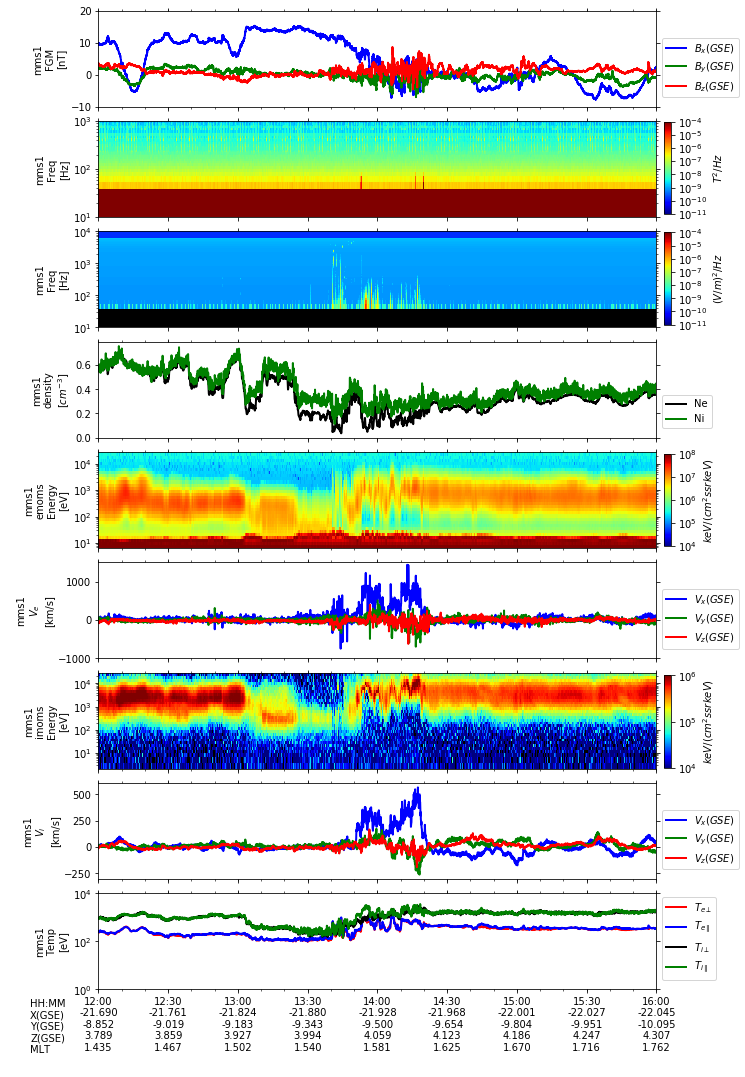

In [54]:
num_rows = 9
num_cols = 1
#create the figure
fig_c      = plt.figure(figsize=(10,2*num_rows))
ax_Bvec_c  = fig_c.add_subplot(num_rows,num_cols,1)
ax_DES_c   = fig_c.add_subplot(num_rows,num_cols,5)
ax_DIS_c   = fig_c.add_subplot(num_rows,num_cols,7)
ax_Den_c   = fig_c.add_subplot(num_rows,num_cols,4)
ax_Ve_c    = fig_c.add_subplot(num_rows,num_cols,6)
ax_Vi_c    = fig_c.add_subplot(num_rows,num_cols,8)
ax_T_c     = fig_c.add_subplot(num_rows,num_cols,9)
ax_BPSD_c  = fig_c.add_subplot(num_rows,num_cols,2)
ax_EPSD_c  = fig_c.add_subplot(num_rows,num_cols,3)

#load the panels
Bvec_c = Plasma_Plotter.make_Bvector_panel(ax_Bvec_c,obs,fgm_s_munge)
DES_c  = Plasma_Plotter.make_Et_panel(fig_c,ax_DES_c,obs,emoms_f_munge,'emoms',0,4,8)
DIS_c  = Plasma_Plotter.make_Et_panel(fig_c,ax_DIS_c,obs,imoms_f_munge,'imoms',0,4,6)
Den_c  = Plasma_Plotter.make_density_panel(ax_Den_c,obs,emoms_f_munge,imoms_f_munge)
Ve_c   = Plasma_Plotter.make_sVvector_panel(ax_Ve_c,obs,emoms_f_munge,'emoms')
Vi_c   = Plasma_Plotter.make_sVvector_panel(ax_Vi_c,obs,imoms_f_munge,'imoms')
T_c    = Plasma_Plotter.make_temperature_panel(ax_T_c,obs,emoms_f_munge,imoms_f_munge)
BPSD_c = Plasma_Plotter.make_psd_panel(fig_c,ax_BPSD_c,obs,bpsd_munge,'bpsd')
EPSD_c = Plasma_Plotter.make_psd_panel(fig_c,ax_EPSD_c,obs,epsd_munge,'epsd')

#set the time formatting
t_major_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,30),'int':1,'form':'%H:%M'}
t_minor_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,10),'int':1,'form':''}

#customize the axes
#set the tick locations
Bvec_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DES_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DIS_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Den_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Ve_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Vi_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
T_c.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')

ax_Bvec_c.set_xticklabels([])
ax_DES_c.set_xticklabels([])
ax_DIS_c.set_xticklabels([])
ax_Den_c.set_xticklabels([])
ax_Ve_c.set_xticklabels([])
ax_Vi_c.set_xticklabels([])
#x_T_c.set_xticklabels([])
ax_BPSD_c.set_xticklabels([])
ax_EPSD_c.set_xticklabels([])

ax_Bvec_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DES_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DIS_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Den_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Ve_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Vi_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_T_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_BPSD_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_EPSD_c.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])

ax_Bvec_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DES_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DIS_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Den_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Ve_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Vi_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_T_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_BPSD_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_EPSD_c.tick_params(which='both',bottom=True,top=True,left=True,right=True)

Grapher.add_info_box(fig_c,(0.03,0.076,0.04,0.04),'HH:MM\nX(GSE)\nY(GSE)\nZ(GSE)\nMLT',border='off')

fig_c.canvas.draw_idle()

tknots = ax_T_c.get_xticks()
#ax_BPSD_c.set_xticks(tknots)
#ax_EPSD_c.set_xticks(tknots)
tlabs  = ax_T_c.get_xticklabels()
counter = 0
for item in tlabs:
    pos        = calc_mec_to_tknot(tknots[counter],mec_munge,'gse')
    decoration = '\n'+'{0:.3f}\n{1:.3f}\n{2:.3f}\n{3:.3f}'.format(pos[0],pos[1],pos[2],float(pos[3]))
    tlabs[counter].set_text(item.get_text()+decoration)
    counter += 1
ax_T_c.set_xticklabels(tlabs)
 

plt.subplots_adjust(hspace=0.15)

ax_Bvec_c.legend(loc=(1.01,0.1))
ax_Den_c.legend(loc=(1.01,0.1))
ax_Ve_c.legend(loc=(1.01,0.1))
ax_Vi_c.legend(loc=(1.01,0.1))
ax_T_c.legend(loc=(1.01,0.1))

Bvec_c.customize_ax({'ylim':[-10,20]})
ax_BPSD_c.set_ylim([10,1000])
ax_EPSD_c.set_ylim([10,10000])
Ve_c.customize_ax({'ylim':[-1000,1500]})
Den_c.customize_ax({'yscale':'linear'})

In [55]:
#fig_c.savefig('c:/Users/cschiff/Documents/github/Ion_Flow_06_08_2017_1200-1500_GSE.png')

## Burst Interval Plots

In [117]:
calculate_scalar_pressure(emoms_munge)
calculate_scalar_pressure(imoms_munge)

In [119]:
calculate_plasma_beta(fgm_munge,emoms_munge)
calculate_plasma_beta(fgm_munge,imoms_munge)

fgm flavored
fgm flavored
fgm flavored
fgm flavored
fgm flavored
fgm flavored


In [209]:
#specify the time
t_anchor = dt.datetime(2017,6,8,13,46,30)
t_window = dt.timedelta(minutes=1.0)
t_step   = dt.timedelta(minutes=1.0) 
n        = 0
t_start  = t_anchor+n*t_step 
t_stop   = t_start+t_window

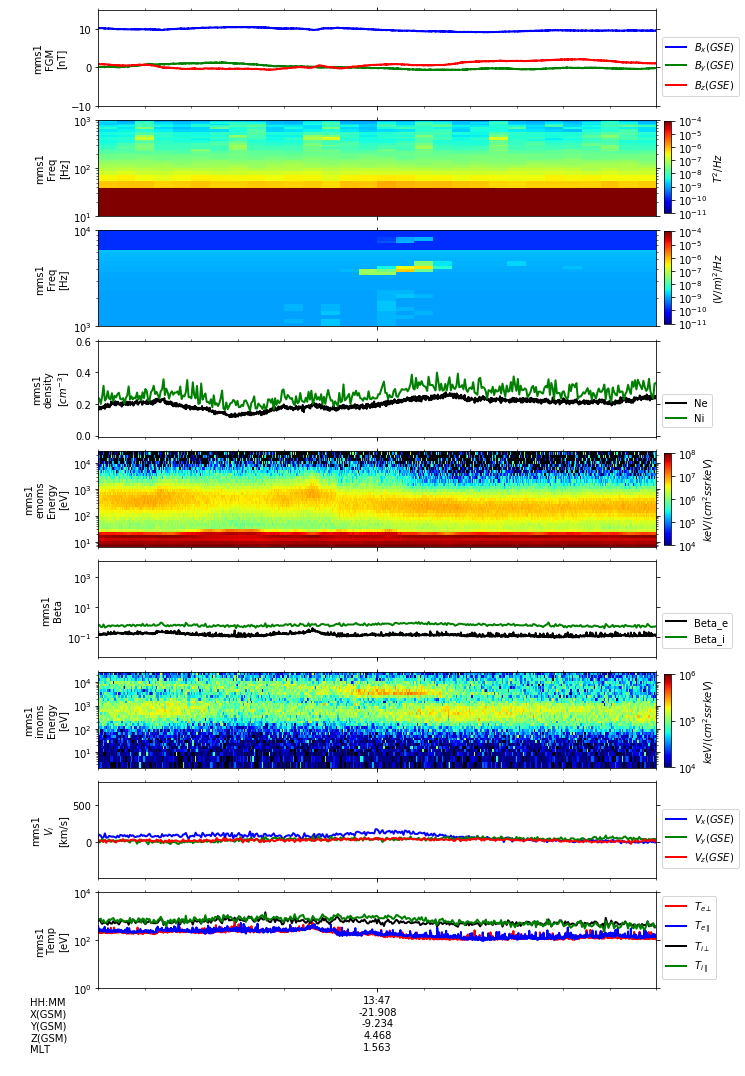

In [213]:
num_rows = 9
num_cols = 1
#create the figure
fig = plt.figure(figsize=(10,2*num_rows))
ax_Bvec  = fig.add_subplot(num_rows,num_cols,1)
ax_DES   = fig.add_subplot(num_rows,num_cols,5)
ax_DIS   = fig.add_subplot(num_rows,num_cols,7)
ax_Den   = fig.add_subplot(num_rows,num_cols,4)
ax_Beta  = fig.add_subplot(num_rows,num_cols,6)
ax_Vi    = fig.add_subplot(num_rows,num_cols,8)
ax_T     = fig.add_subplot(num_rows,num_cols,9)
ax_BPSD  = fig.add_subplot(num_rows,num_cols,2)
ax_EPSD  = fig.add_subplot(num_rows,num_cols,3)

#load the panels
Bvec = Plasma_Plotter.make_Bvector_panel(ax_Bvec,obs,fgm_munge)
DES  = Plasma_Plotter.make_Et_panel(fig,ax_DES,obs,emoms_munge,'emoms',0,4,8)
DIS  = Plasma_Plotter.make_Et_panel(fig,ax_DIS,obs,imoms_munge,'imoms',0,4,6)
Den  = Plasma_Plotter.make_density_panel(ax_Den,obs,emoms_munge,imoms_munge)
Beta = Plasma_Plotter.make_beta_panel(ax_Beta,obs,emoms_munge,imoms_munge)
Vi   = Plasma_Plotter.make_sVvector_panel(ax_Vi,obs,imoms_munge,'imoms')
T    = Plasma_Plotter.make_temperature_panel(ax_T,obs,emoms_munge,imoms_munge)
BPSD = Plasma_Plotter.make_psd_panel(fig,ax_BPSD,obs,bpsd_munge,'bpsd')
EPSD = Plasma_Plotter.make_psd_panel(fig,ax_EPSD,obs,epsd_munge,'epsd')



#set the time formatting
t_major_parms = {'loc':mdates.MinuteLocator,'by':range(0,60,1),  'int':1,'form':'%H:%M'}
t_minor_parms = {'loc':mdates.SecondLocator,'by':range(0,60,5),'int':1,'form':''}

#customize the axes
#set the tick locations
Bvec.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DES.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
DIS.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Den.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Beta.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
Vi.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')
T.format_ax_time(0,t_major_parms,t_minor_parms,tstyle='custom')

ax_Bvec.set_xticklabels([])
ax_DES.set_xticklabels([])
ax_DIS.set_xticklabels([])
ax_Den.set_xticklabels([])
ax_Beta.set_xticklabels([])
ax_Vi.set_xticklabels([])
#ax_T.set_xticklabels([])
ax_BPSD.set_xticklabels([])
ax_EPSD.set_xticklabels([])


Bvec.customize_ax({'ylim':[-10,15]})
ax_BPSD.set_ylim([10,1000])
ax_EPSD.set_ylim([1000,10000])
#Ve.customize_ax({'ylim':[-400,200]})
Den.customize_ax({'yscale':'linear'})

ax_Bvec.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DES.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_DIS.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Den.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Beta.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_Vi.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_T.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_BPSD.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])
ax_EPSD.set_xlim([mdates.date2num(t_start),mdates.date2num(t_stop)])



ax_Bvec.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DES.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_DIS.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Den.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Beta.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_Vi.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_T.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_BPSD.tick_params(which='both',bottom=True,top=True,left=True,right=True)
ax_EPSD.tick_params(which='both',bottom=True,top=True,left=True,right=True)

Grapher.add_info_box(fig,(0.03,0.076,0.04,0.04),'HH:MM\nX(GSM)\nY(GSM)\nZ(GSM)\nMLT',border='off')

fig.canvas.draw_idle()


tknots = ax_T.get_xticks()
ax_BPSD.set_xticks(tknots)
ax_EPSD.set_xticks(tknots)
tlabs  = ax_T.get_xticklabels()
counter = 0
for item in tlabs:
    pos        = calc_mec_to_tknot(tknots[counter],mec_munge,'gsm')
    decoration = '\n'+'{0:.3f}\n{1:.3f}\n{2:.3f}\n{3:.3f}'.format(pos[0],pos[1],pos[2],float(pos[3]))
    tlabs[counter].set_text(item.get_text()+decoration)
    counter += 1
ax_T.set_xticklabels(tlabs)
 

plt.subplots_adjust(hspace=0.15)

ax_Bvec.legend(loc=(1.01,0.1))
ax_Den.legend(loc=(1.01,0.1))
ax_Beta.legend(loc=(1.01,0.1))
ax_Vi.legend(loc=(1.01,0.1))
ax_T.legend(loc=(1.01,0.1))

In [214]:
fig.savefig('c:/Users/cschiff/Documents/github/Ion_Flow_06_08_2017_134630-134730.png')